# MOBILE PRICE RANGE PREDECTION


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some reltaion between features of a mobile phone(eg:- RAM,internal Memory,etc) and its selling price.In this problem,we do not have to predict the actual price but a price range indicating how high the price is.

Data Description -

* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


In [1]:
#importing libraries
import pandas as pd 
import numpy as np 

#visualizing libraries
import matplotlib.pyplot as plt 
import seaborn as sns 


#data preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve 
from sklearn.ensemble import IsolationForest 
from sklearn.decomposition import PCA 
from sklearn.model_selection import RandomizedSearchCV 

#Model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier #gradientboosting
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 


#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') # ignore the warning

## Dataset Loading

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df.shape

(2000, 21)

* 2000 rows
* 21 columns

In [5]:
df.size

42000

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

## data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

* minimum value of px_height and sc_w cannot be zero so we need to handle that
* No null values
1. Battery and RAM 
* battery_power mean: 1238, ranging from 501 to 1998
* ram mean: 2124, ranging from 256 to 3998
* Suggests these two are likely strong predictors of price.
2. Camera Features
  * fc (front cam): Mean ~4.3MP, max 19MP
  * pc (primary cam): Mean ~9.9MP, max 20MP
  * Appears well-distributed—could also be good predictors.
* px_height and px_width show large spread, min height is 0, indicating missing or zeroed-out data
* Range: 2 GB to 64 GB
* Normal distribution centered around 32 GB
* Mean: 1.5, Std Dev: 1.11
* Indicates even distribution across 0, 1, 2, 3

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

NO NULL VALUES

In [11]:
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [12]:

#where ther is sc_W and px_height is zero ,assigning mean values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [13]:
len(df[df.duplicated()])

0

No Duplicate values

In [14]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## EDA (Exploratory Data Analysis) and Feature Engineering

### Univariate

#### Price 

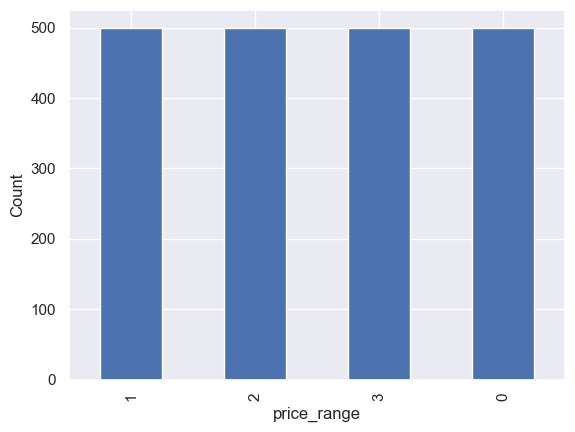

In [15]:
#classes
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

There are mobiles in 4 range and all are similar meaning equal no of dataset

#### Battery

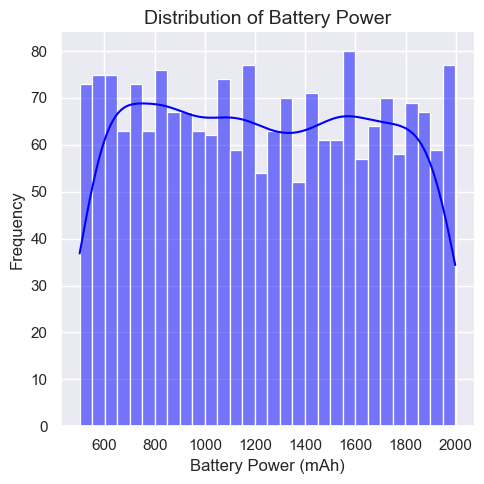

In [16]:
sns.set( rc={'figure.figsize': (7, 5)})

# Distribution plot with more features
ax = sns.displot(
    data=df,
    x="battery_power",
    bins=30,                 # custom number of bins
    kde=True,                # show KDE (smoothed curve)
    color="blue"          # change bar color
)

plt.title("Distribution of Battery Power", fontsize=14)
plt.xlabel("Battery Power (mAh)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

this plot shows how the battery mAh is spread. there is a gradual increase as the price range increases

#### BLuetooth

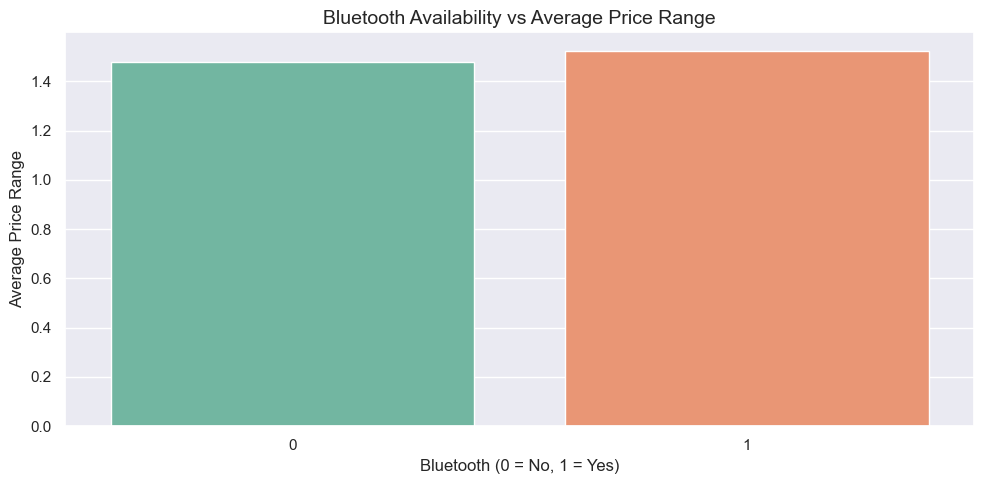

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax, palette='Set2', ci=None)

ax.set_title("Bluetooth Availability vs Average Price Range", fontsize=14)
ax.set_xlabel("Bluetooth (0 = No, 1 = Yes)", fontsize=12)
ax.set_ylabel("Average Price Range", fontsize=12)
plt.tight_layout()
plt.show()

Half has bluetooth half don't

#### RAM

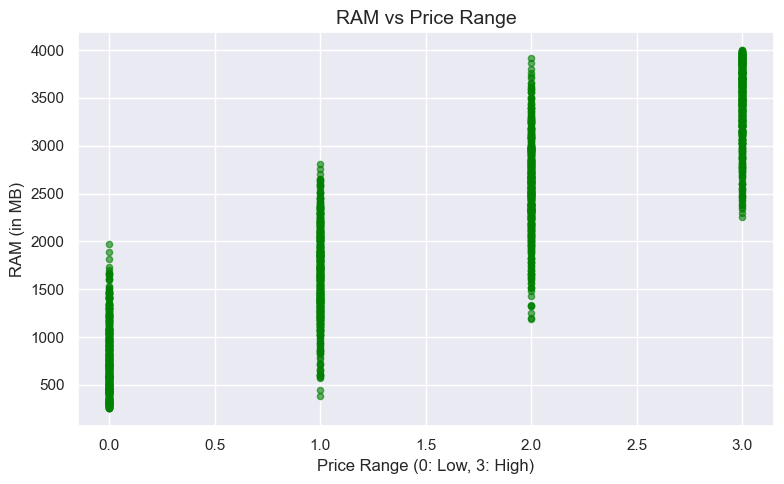

In [18]:
df.plot(x='price_range', y='ram', kind='scatter', color='green', figsize=(8, 5), alpha=0.6)

plt.title("RAM vs Price Range", fontsize=14)
plt.xlabel("Price Range (0: Low, 3: High)", fontsize=12)
plt.ylabel("RAM (in MB)", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

RAM grows continously and increase cost

#### Pixel width

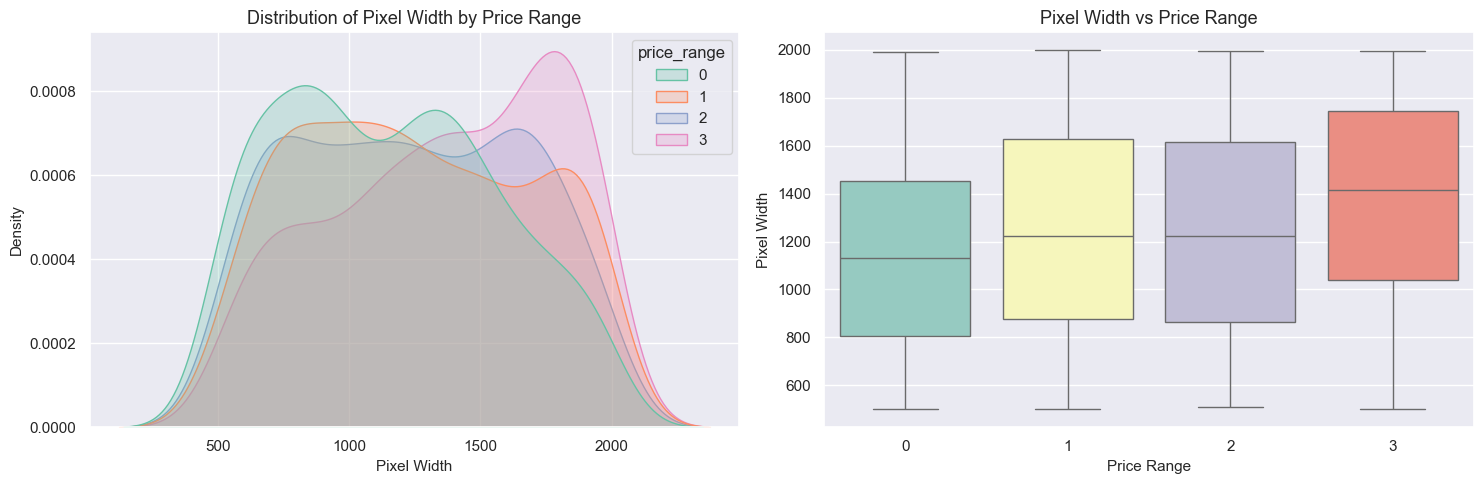

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# KDE Plot
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='Set2', ax=axs[0])
axs[0].set_title("Distribution of Pixel Width by Price Range", fontsize=13)
axs[0].set_xlabel("Pixel Width", fontsize=11)
axs[0].set_ylabel("Density", fontsize=11)

# Boxplot
sns.boxplot(data=df, x='price_range', y='px_width', palette='Set3', ax=axs[1])
axs[1].set_title("Pixel Width vs Price Range", fontsize=13)
axs[1].set_xlabel("Price Range", fontsize=11)
axs[1].set_ylabel("Pixel Width", fontsize=11)

plt.tight_layout()
plt.show()

* KDE plot: Shows the distribution shape of px_width per price_range
* Boxplot: Highlights median, IQR, and outliers
* There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width. so we can say that it would be a driving factor in deciding price_range.

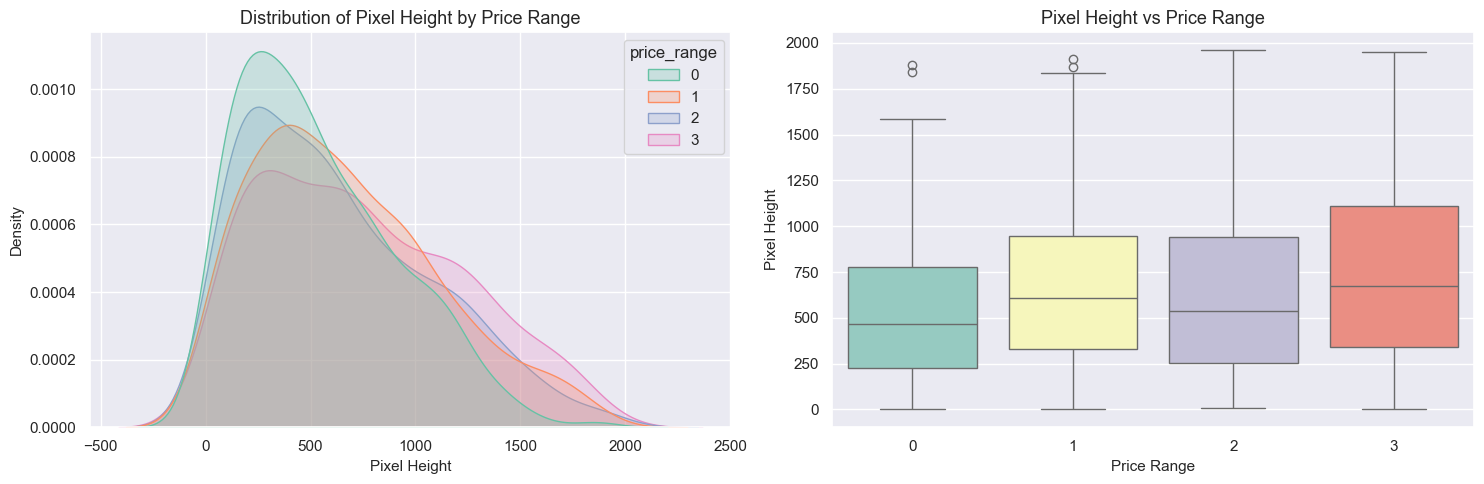

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# KDE Plot
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='Set2', ax=axs[0])
axs[0].set_title("Distribution of Pixel Height by Price Range", fontsize=13)
axs[0].set_xlabel("Pixel Height", fontsize=11)
axs[0].set_ylabel("Density", fontsize=11)

# Boxplot
sns.boxplot(data=df, x='price_range', y='px_height', palette='Set3', ax=axs[1])
axs[1].set_title("Pixel Height vs Price Range", fontsize=13)
axs[1].set_xlabel("Price Range", fontsize=11)
axs[1].set_ylabel("Pixel Height", fontsize=11)

plt.tight_layout()
plt.show()

Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height

#### Front Camera

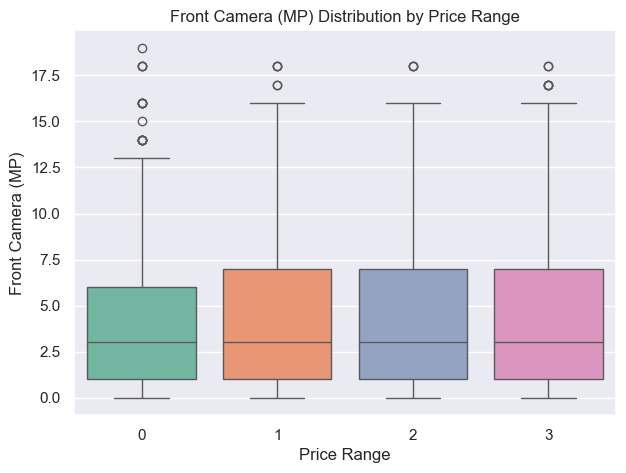

In [21]:
sns.boxplot(data=df, x='price_range', y='fc', palette='Set2')
plt.title("Front Camera (MP) Distribution by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Front Camera (MP)")
plt.show()

#### Primary Camera

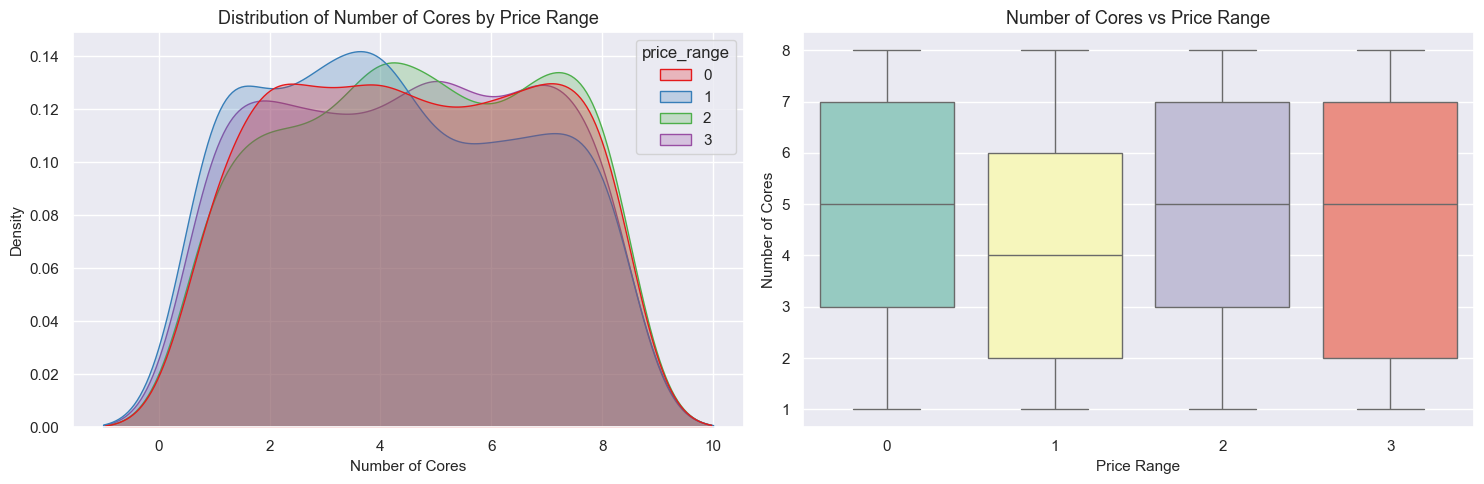

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# KDE Plot
sns.kdeplot(
    data=df, x='n_cores', hue='price_range',
    fill=True, common_norm=False, palette='Set1', ax=axs[0]
)
axs[0].set_title("Distribution of Number of Cores by Price Range", fontsize=13)
axs[0].set_xlabel("Number of Cores", fontsize=11)
axs[0].set_ylabel("Density", fontsize=11)

# Boxplot
sns.boxplot(data=df, x='price_range', y='n_cores', palette='Set3', ax=axs[1])
axs[1].set_title("Number of Cores vs Price Range", fontsize=13)
axs[1].set_xlabel("Price Range", fontsize=11)
axs[1].set_ylabel("Number of Cores", fontsize=11)

plt.tight_layout()
plt.show()

#### mobile weight

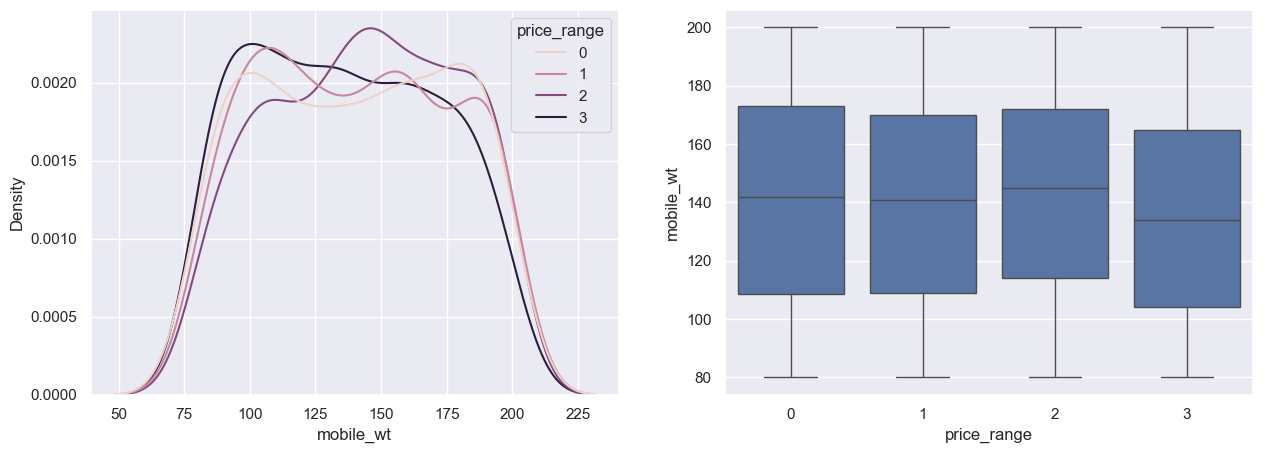

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

Costly phones are lighter

#### Screen Size

convert screen size from cm to inches.

In [24]:
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)
df['sc_size']

0       4.49
1       6.80
2       4.40
3       7.04
4       3.25
        ... 
1995    5.35
1996    5.85
1997    3.57
1998    8.11
1999    7.64
Name: sc_size, Length: 2000, dtype: float64

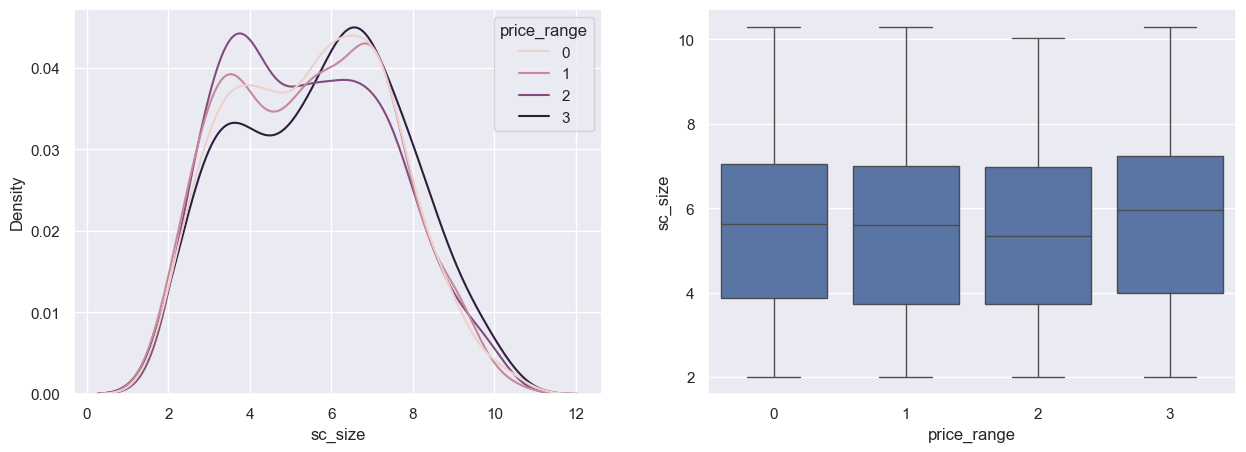

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

In [26]:
df.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)

In [27]:
binary_features = [ 'four_g', 'three_g']

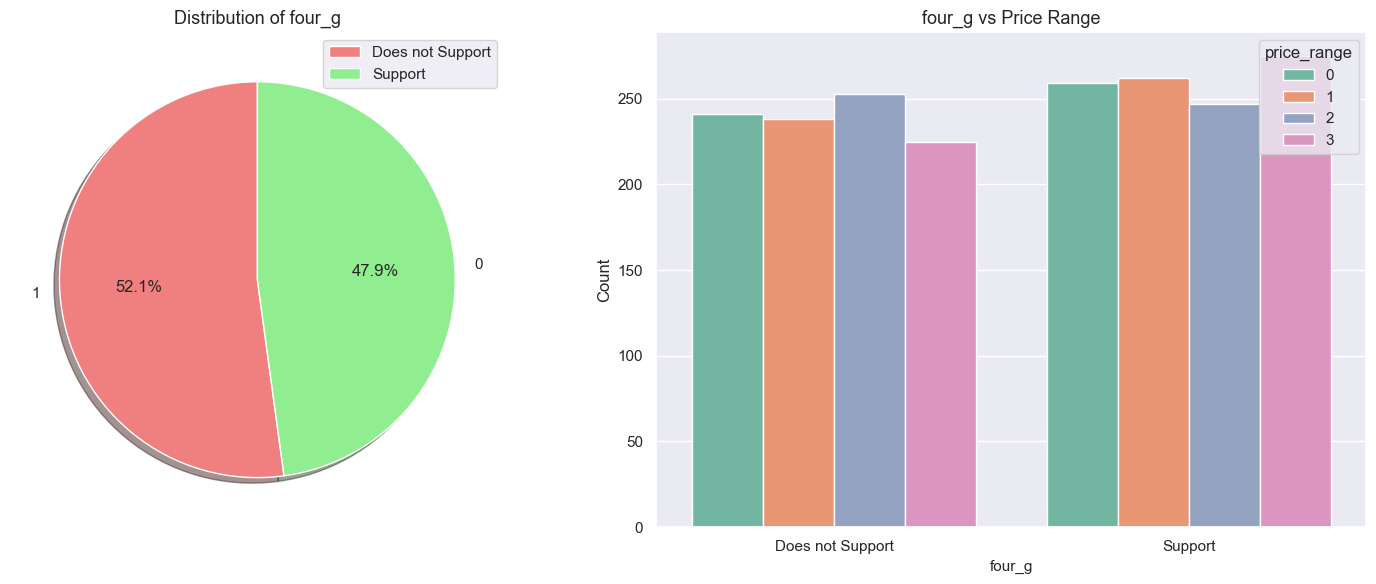

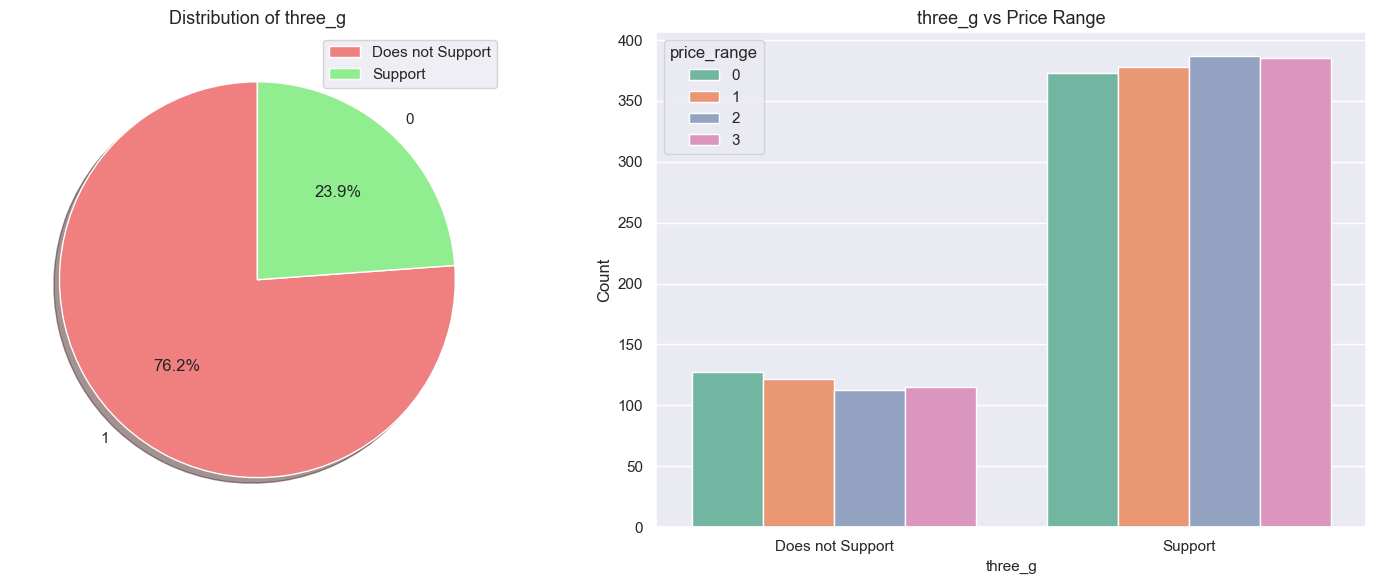

In [28]:
for col in binary_features:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))


    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        ax=ax1,
        shadow=True,
        startangle=90,
        colors=['lightcoral', 'lightgreen'],
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    ax1.set_title(f'Distribution of {col}', fontsize=13)
    ax1.set_ylabel('')
    ax1.legend(['Does not Support', 'Support'], loc='upper right')


    sns.countplot(x=col, hue='price_range', data=df, ax=ax2, palette='Set2')
    ax2.set_title(f'{col} vs Price Range', fontsize=13)
    ax2.set_xlabel(f'{col}', fontsize=11)
    ax2.set_ylabel('Count')
    ax2.set_xticklabels(['Does not Support', 'Support'])


    plt.tight_layout()
    plt.show()

feature 'three_g' play an important feature in prediction

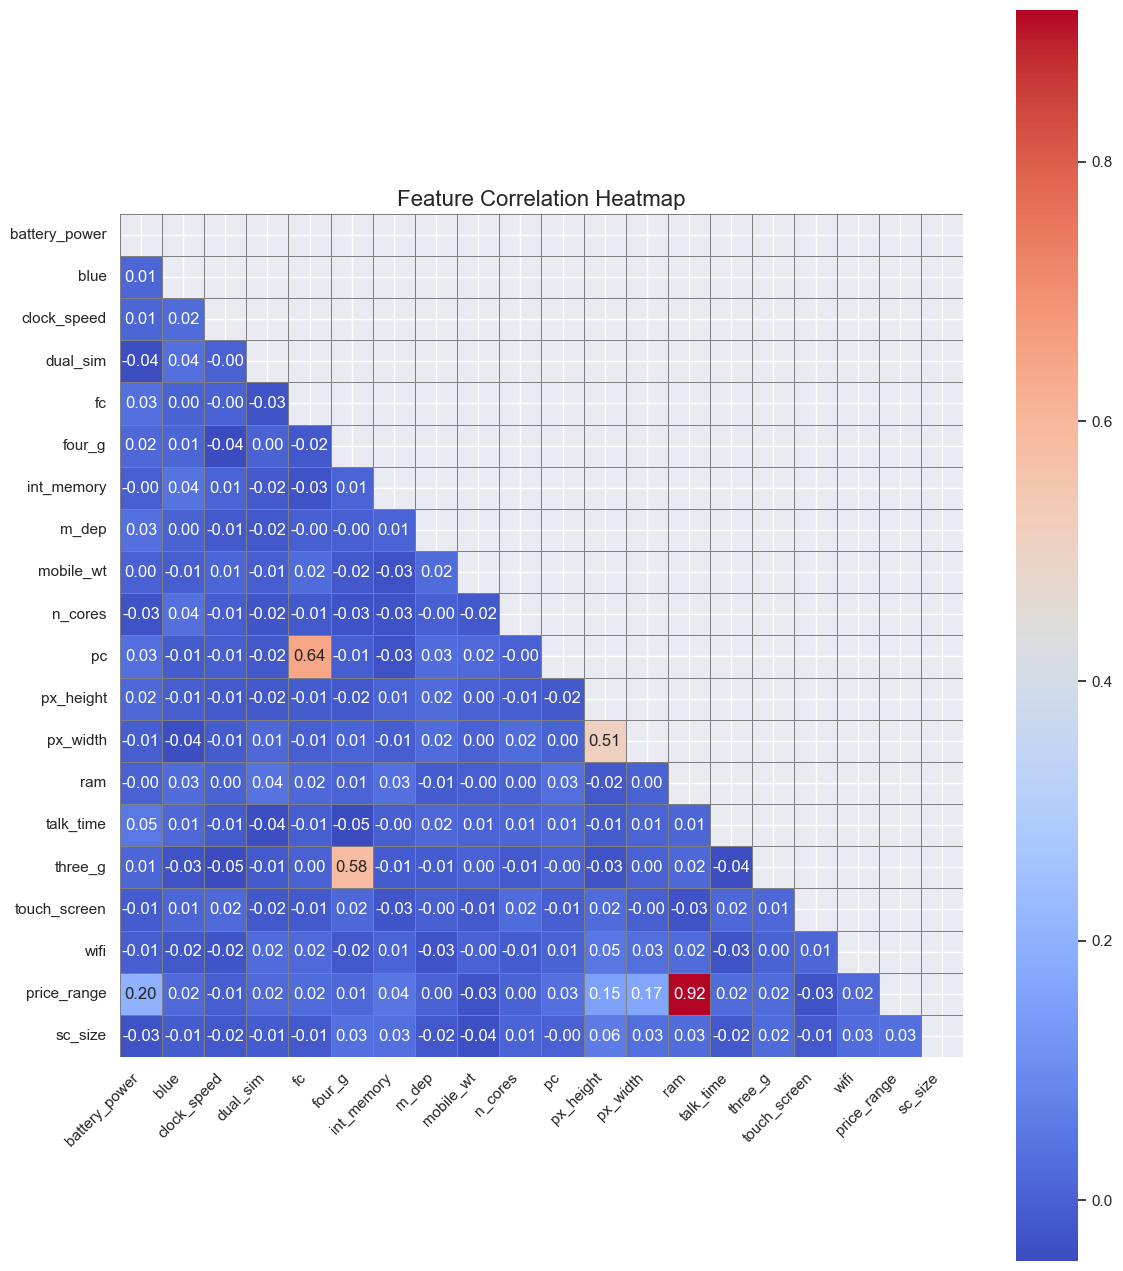

In [29]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(12, 16))  # Slightly larger for readability
sns.heatmap(
    correlation,
    mask=mask,  
    cmap='coolwarm',
    annot=True,
    fmt=".2f",               # Format numbers to 2 decimal places
    linewidths=0.5,          # Add lines between cells
    linecolor='gray',
    square=True,             # Square cells
    cbar_kws={"shrink": 0.8} # Smaller color bar
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

RAM and price_range shows high correlation which is a good sign, it signifies that RAM will play major deciding factor in estimating the price range.
* Also, if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature. 

In [30]:
#  defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)
# Checking for multi-collinearity

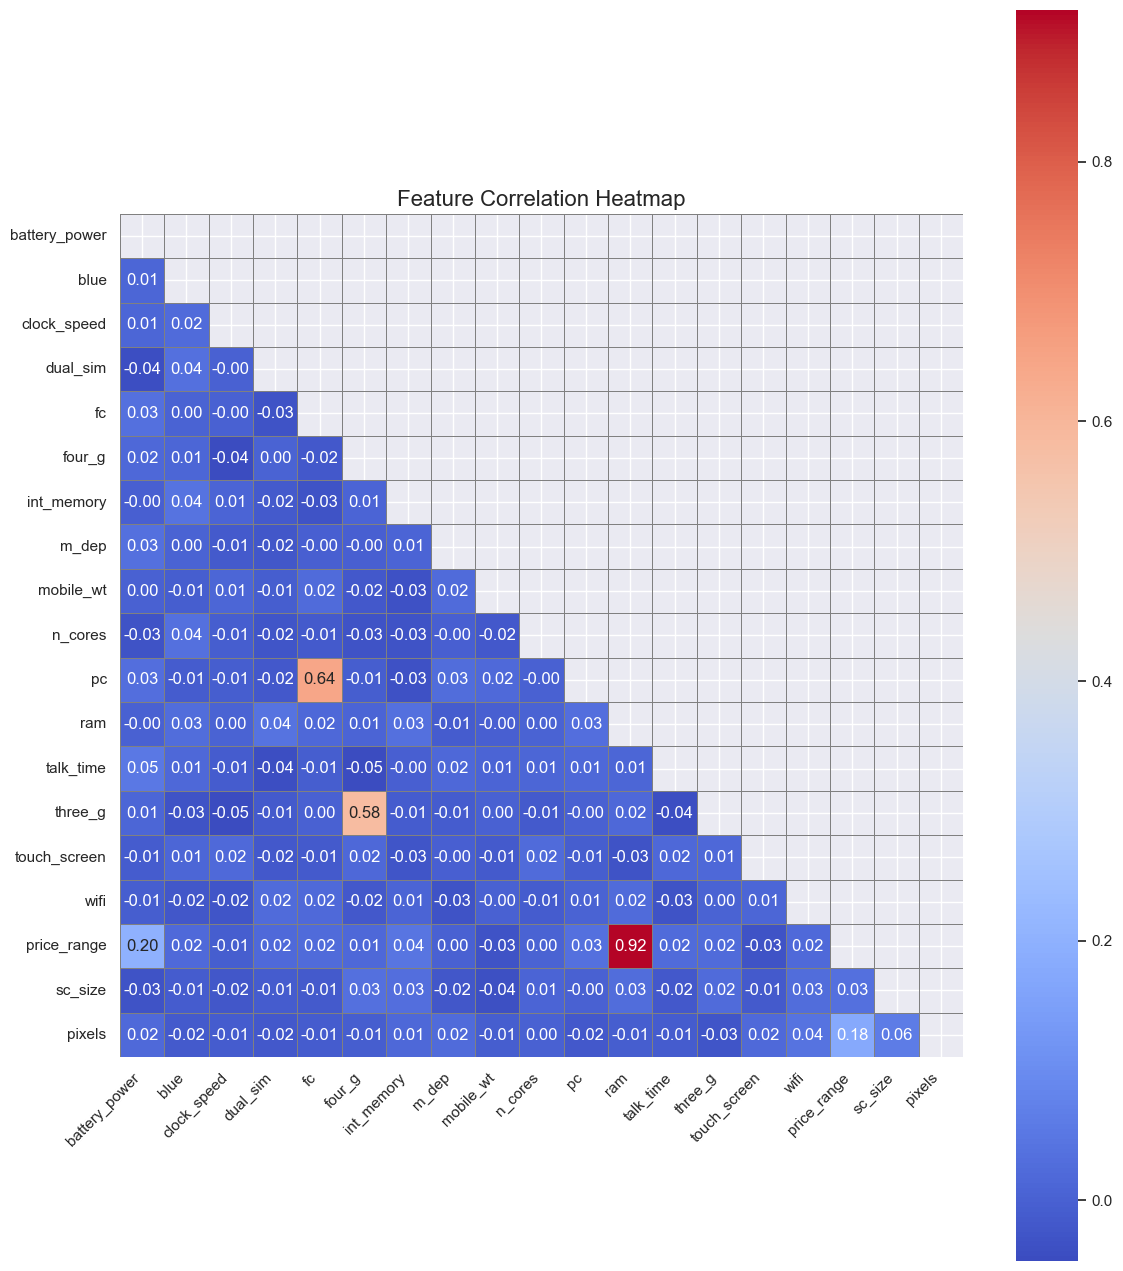

In [31]:
correlation = df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(12, 16))  # Slightly larger for readability
sns.heatmap(
    correlation,
    mask=mask,  
    cmap='coolwarm',
    annot=True,
    fmt=".2f",               # Format numbers to 2 decimal places
    linewidths=0.5,          # Add lines between cells
    linecolor='gray',
    square=True,             # Square cells
    cbar_kws={"shrink": 0.8} # Smaller color bar
)

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

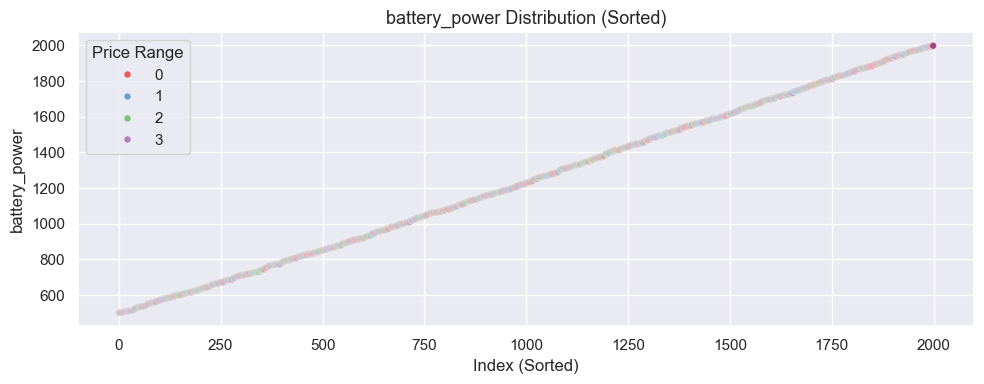

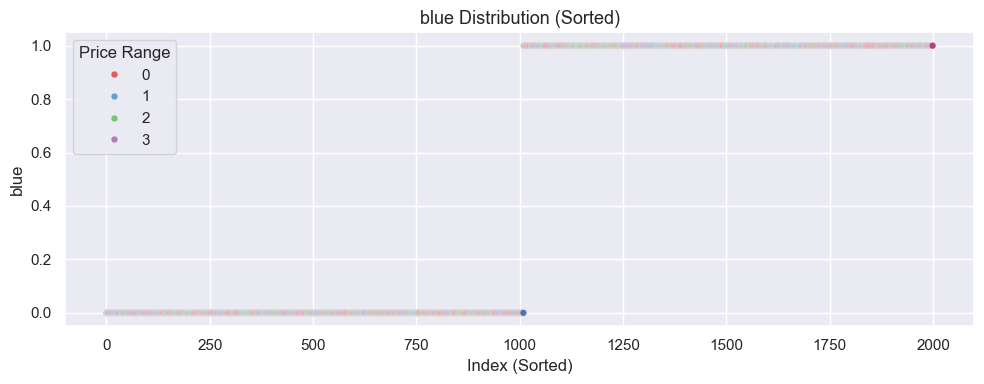

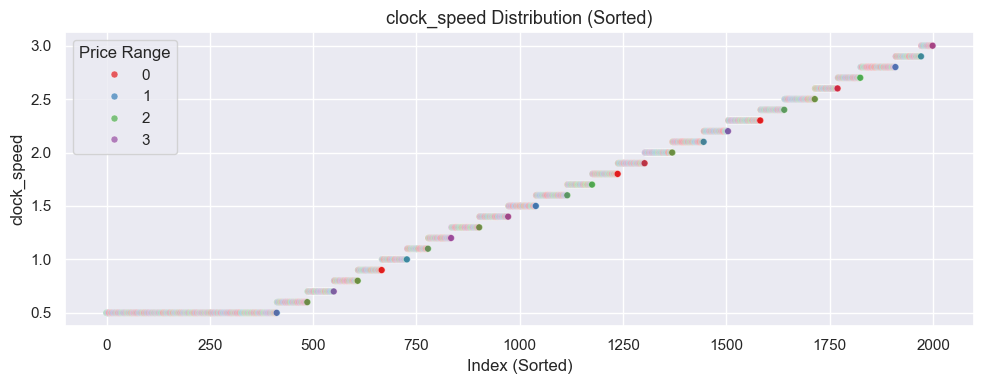

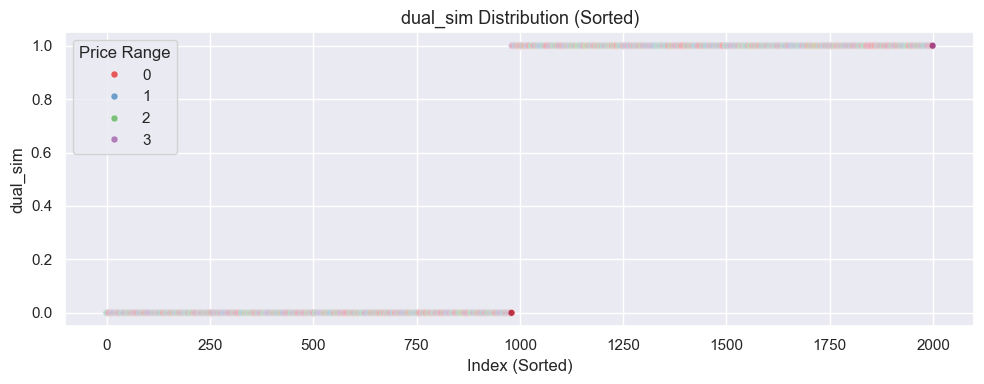

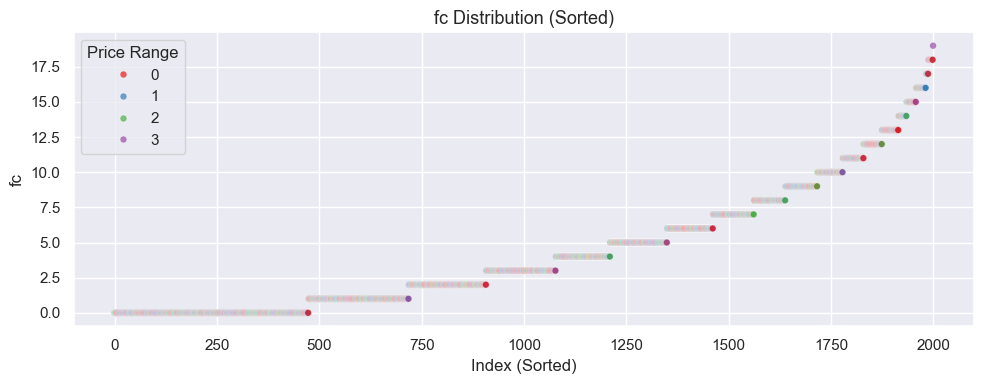

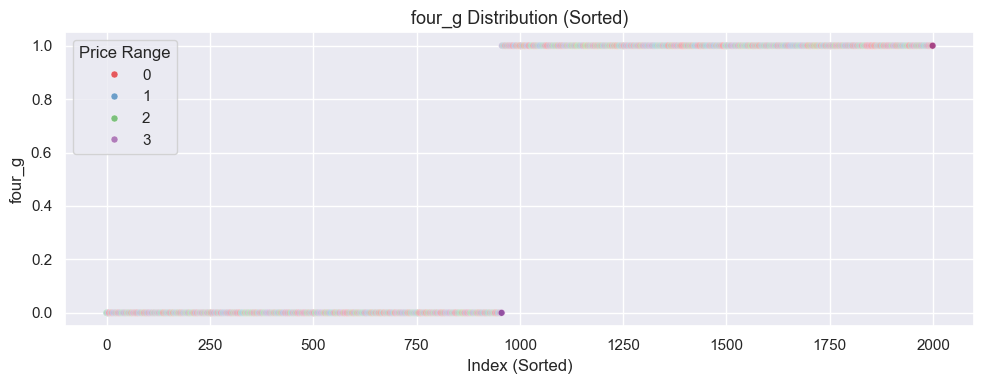

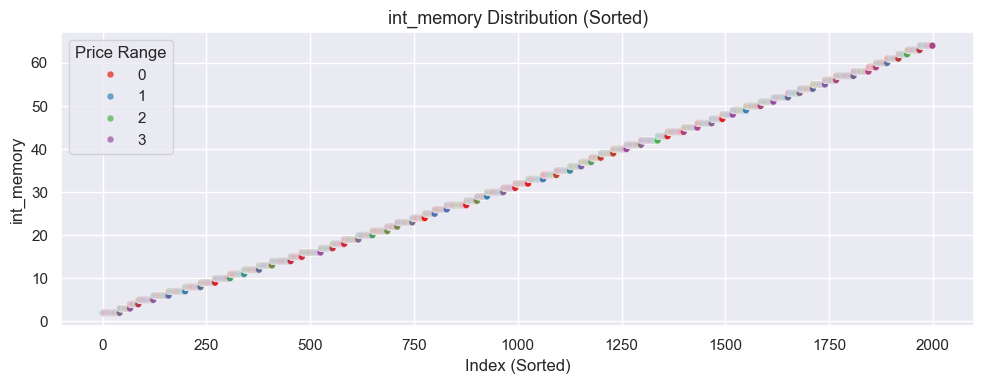

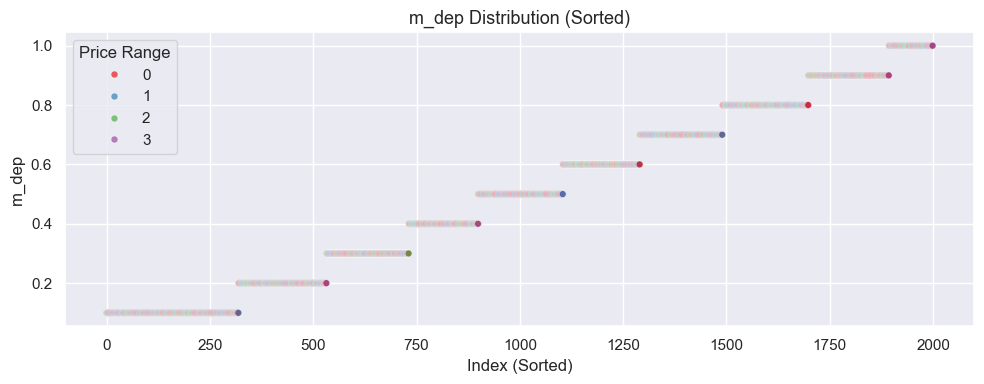

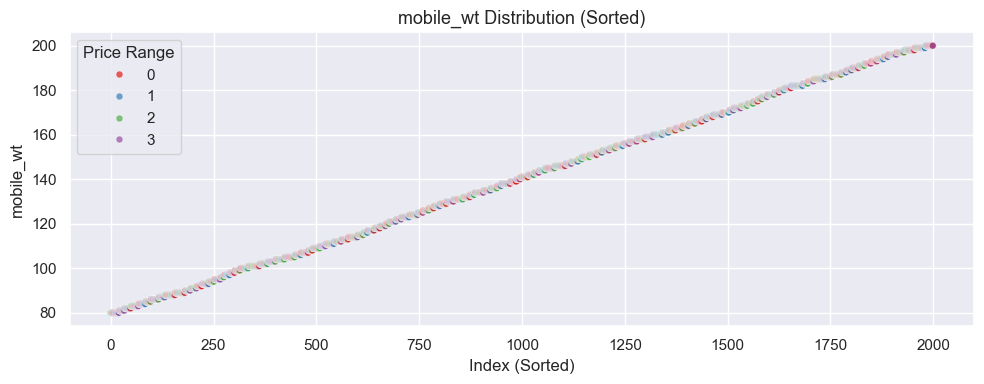

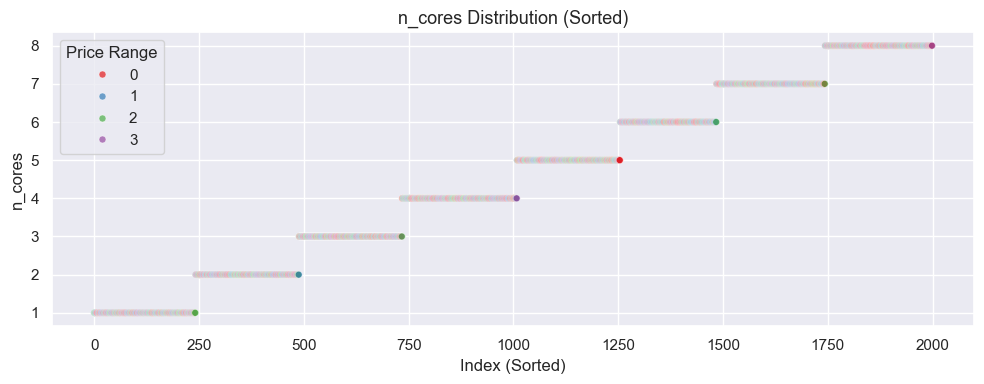

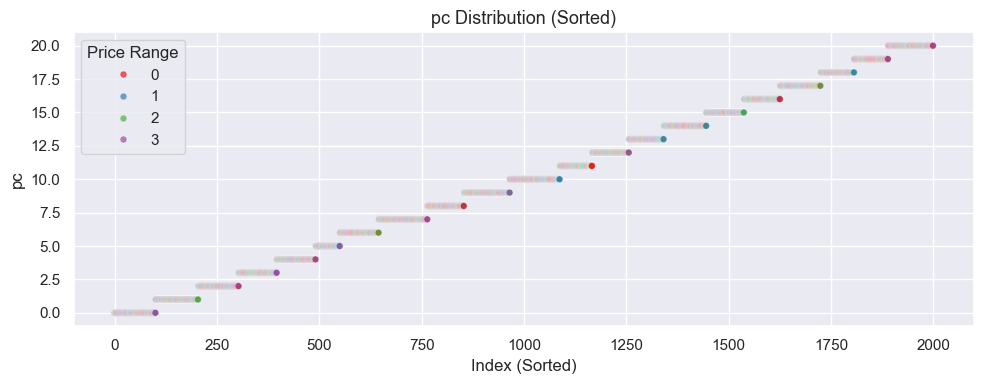

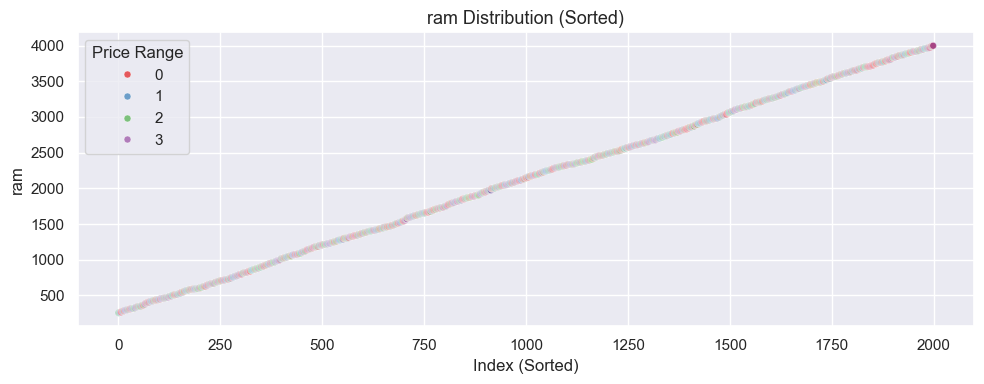

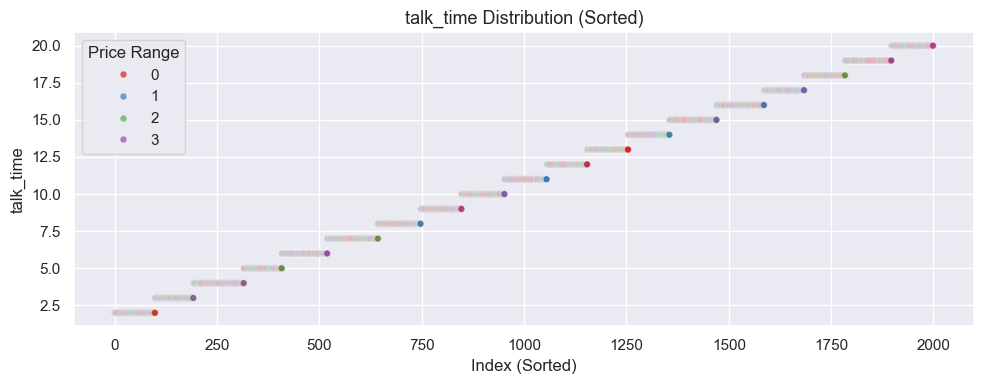

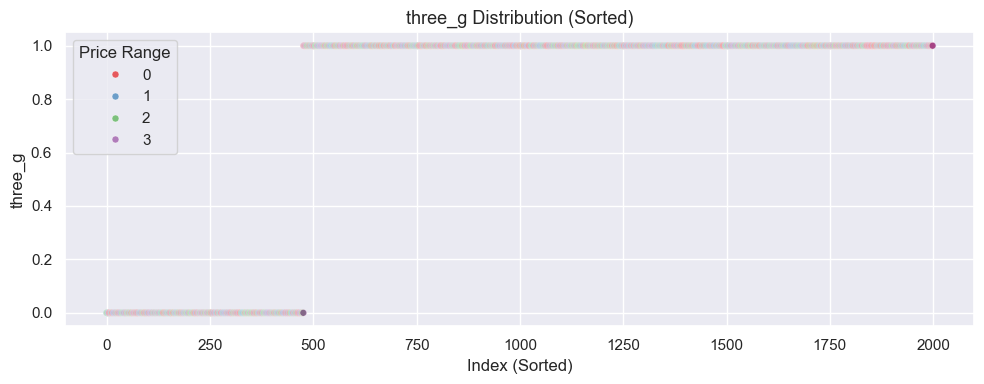

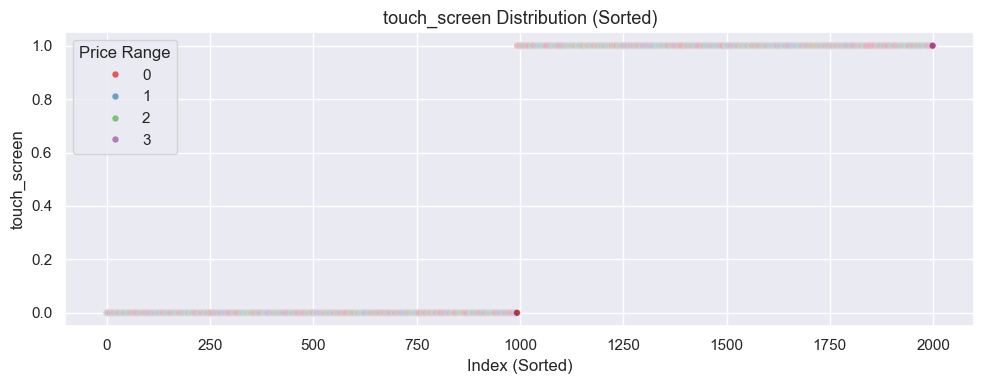

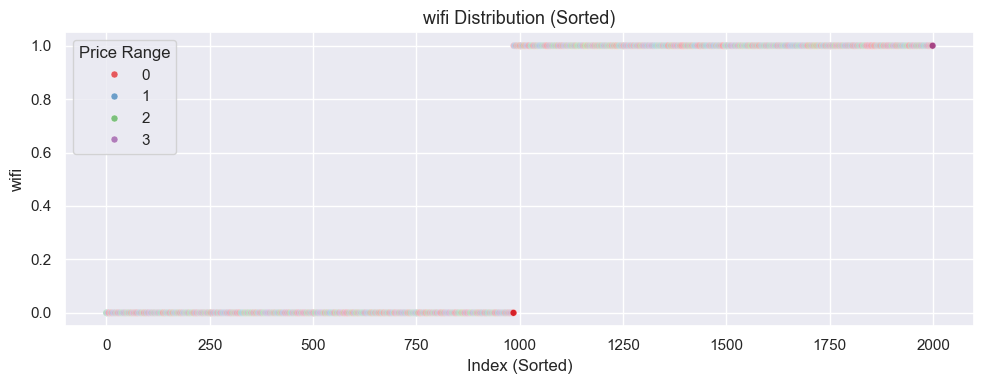

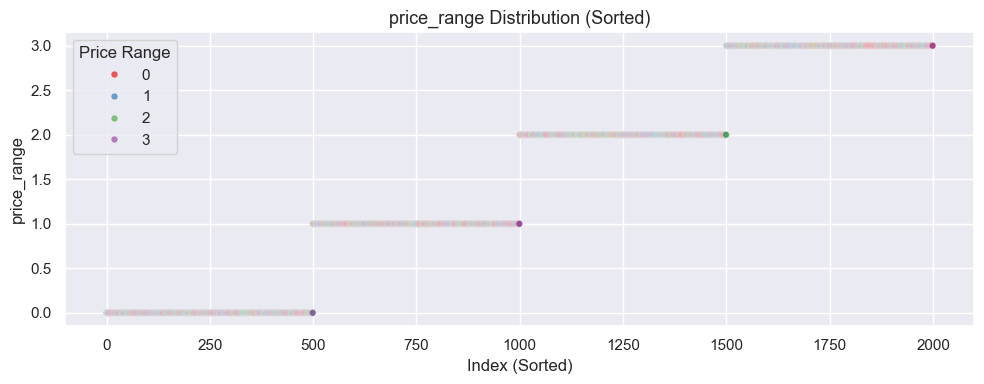

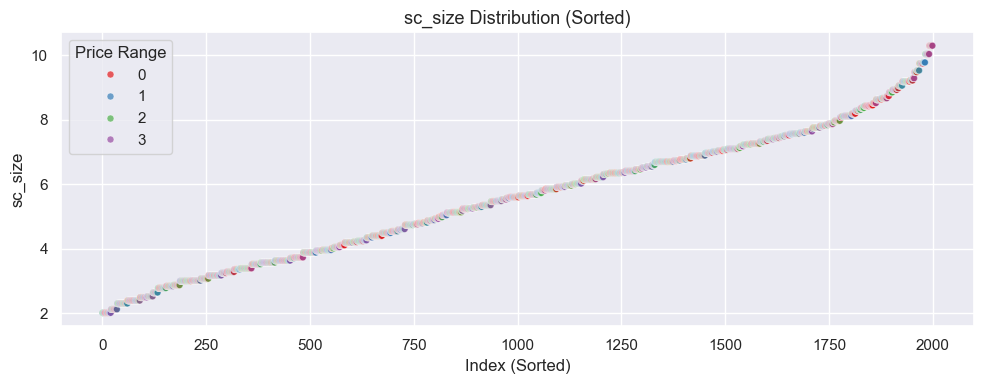

In [32]:
#checking outliers
for i in df.describe().columns[:-1]:  # Exclude 'price_range' if it's last
    plt.figure(figsize=(10, 4))
    sns.scatterplot(
        x=range(len(df[i])),
        y=np.sort(df[i]),
        hue=df['price_range'],
        palette='Set1',
        alpha=0.7,
        s=25
    )
    plt.title(f'{i} Distribution (Sorted)', fontsize=13)
    plt.xlabel('Index (Sorted)')
    plt.ylabel(i)
    plt.legend(title='Price Range', loc='upper left')
    plt.tight_layout()
    plt.show()

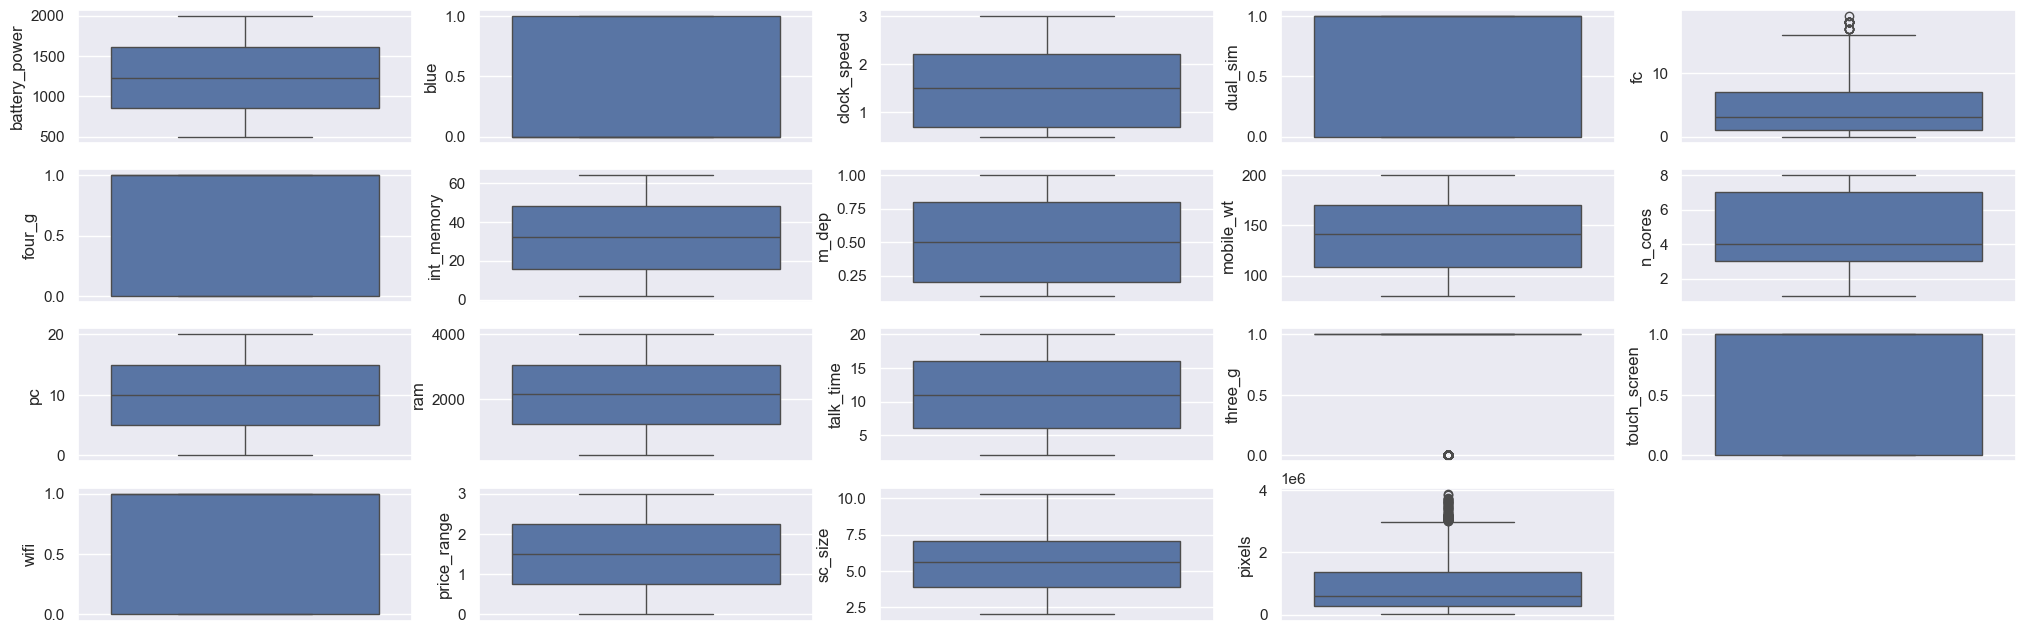

In [33]:
# looking for outliers using box plot
plt.figure(figsize=(25,10))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

in this data we can see that there is very low outilers in the data.

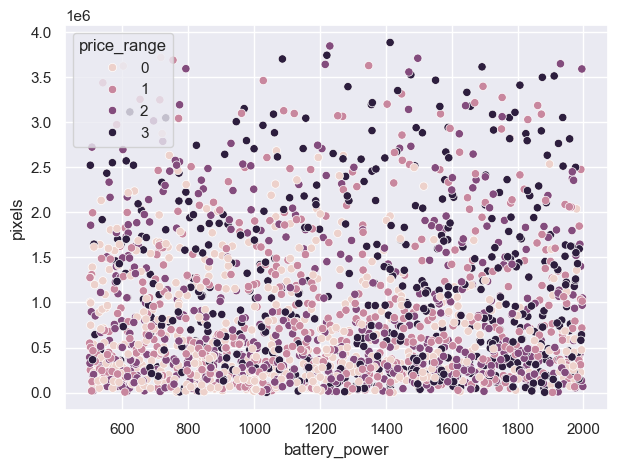

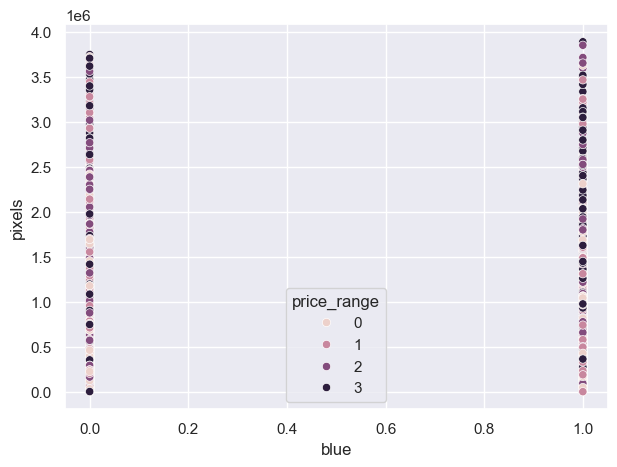

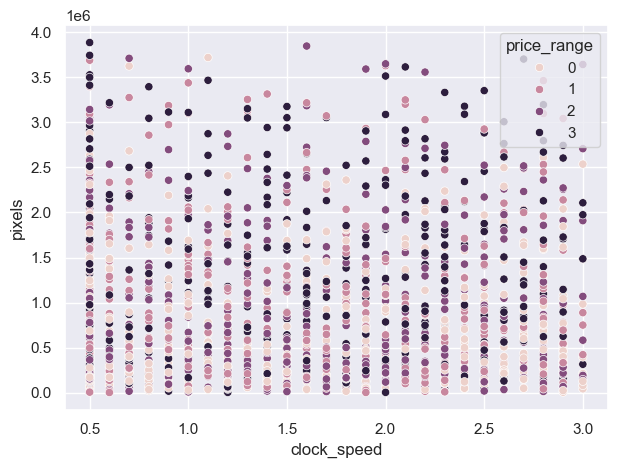

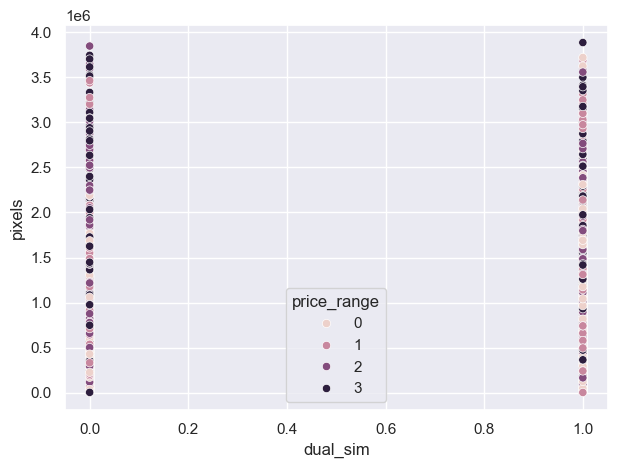

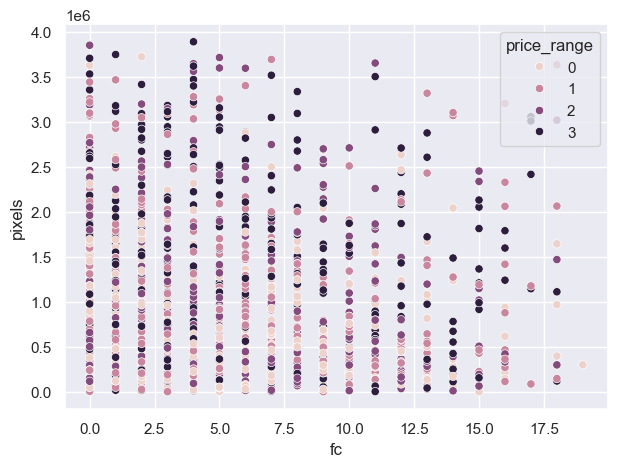

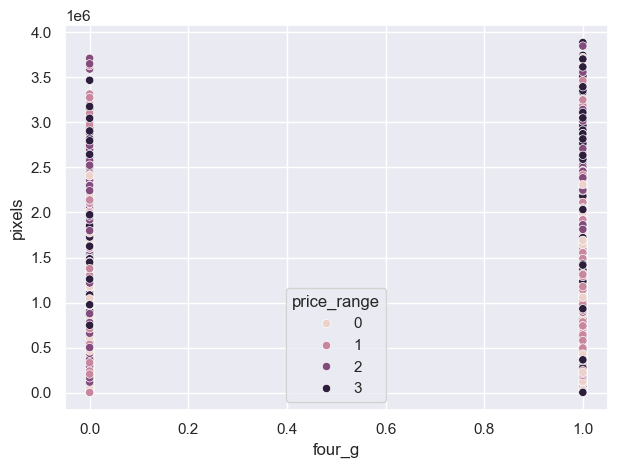

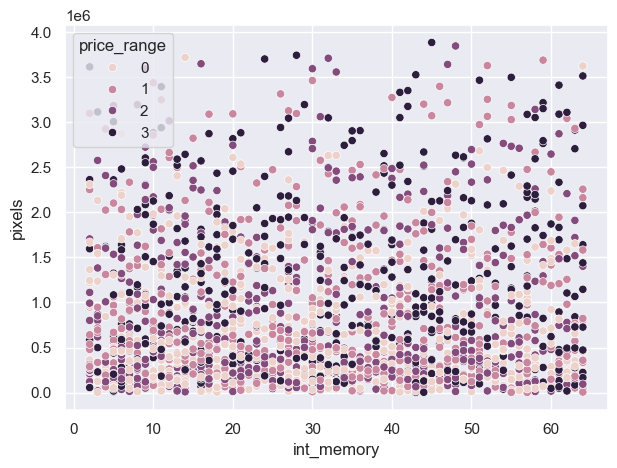

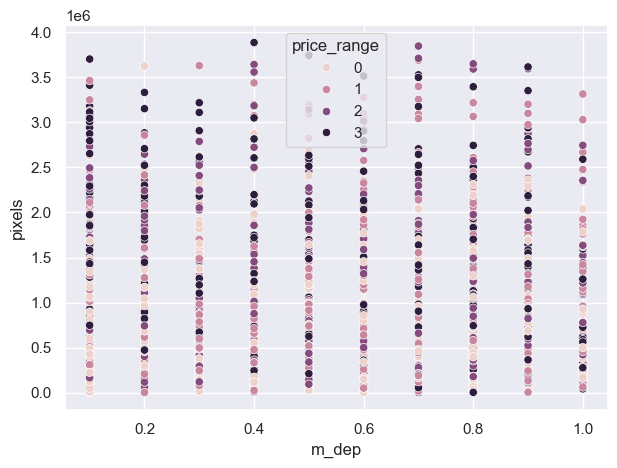

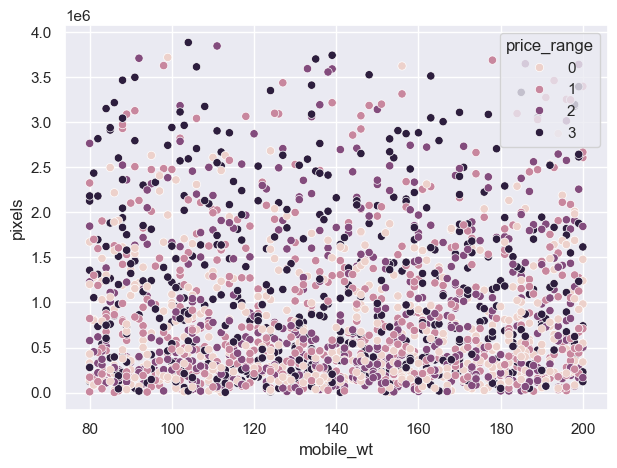

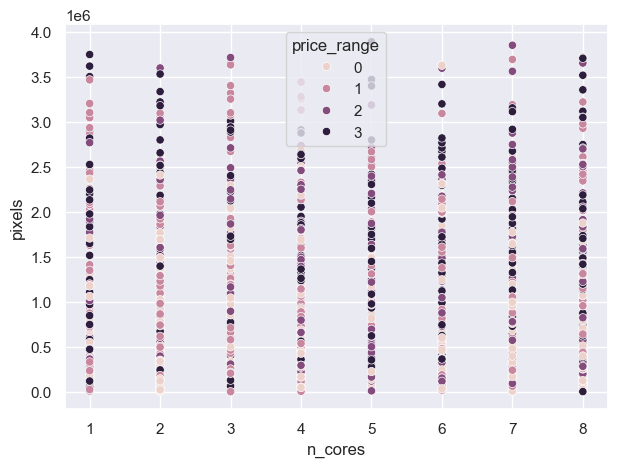

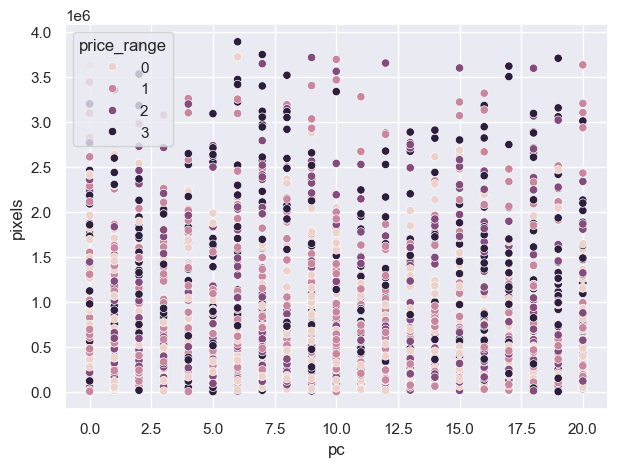

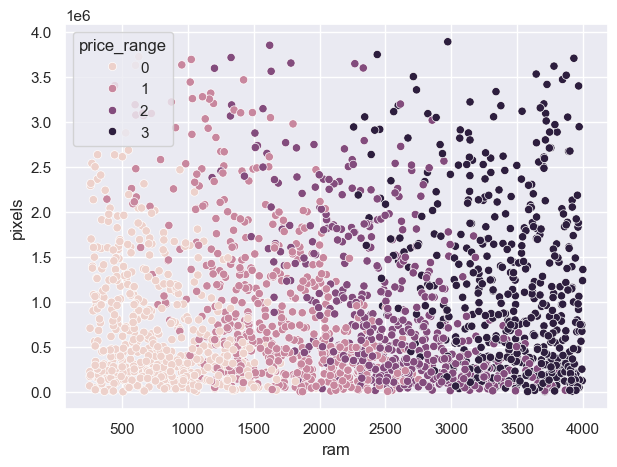

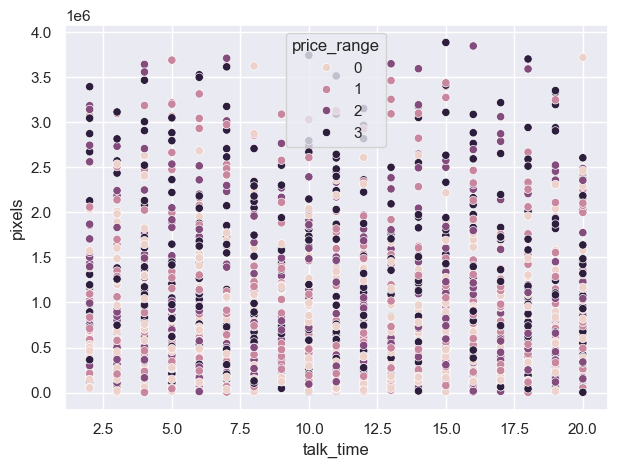

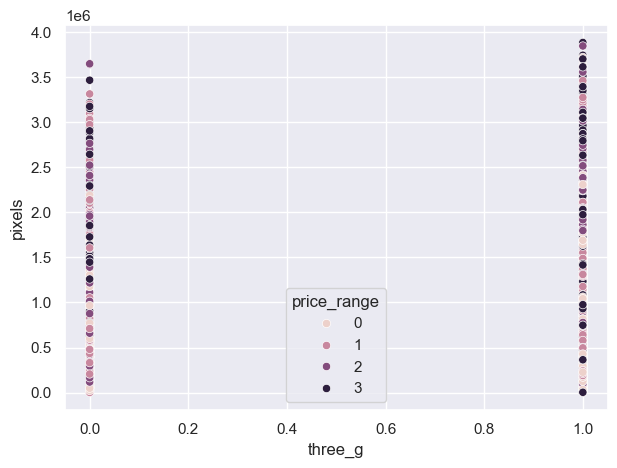

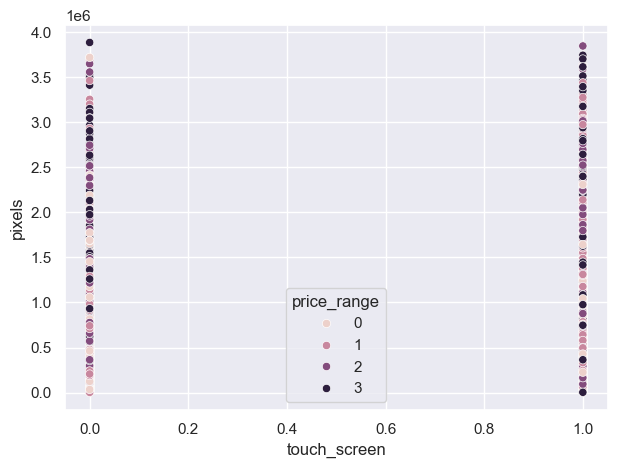

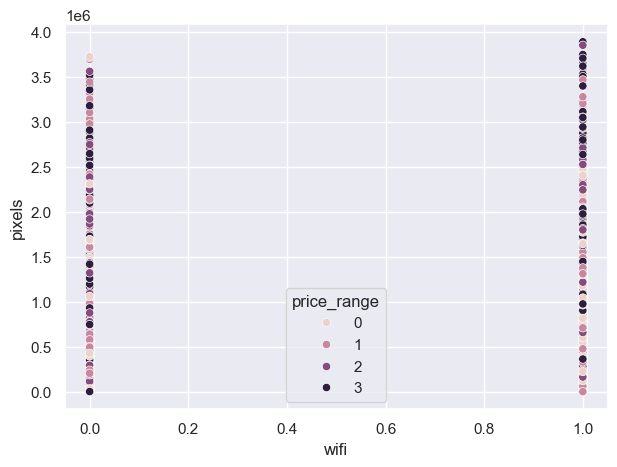

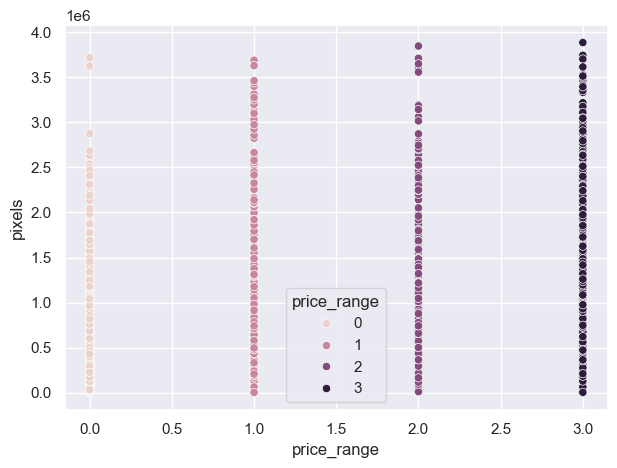

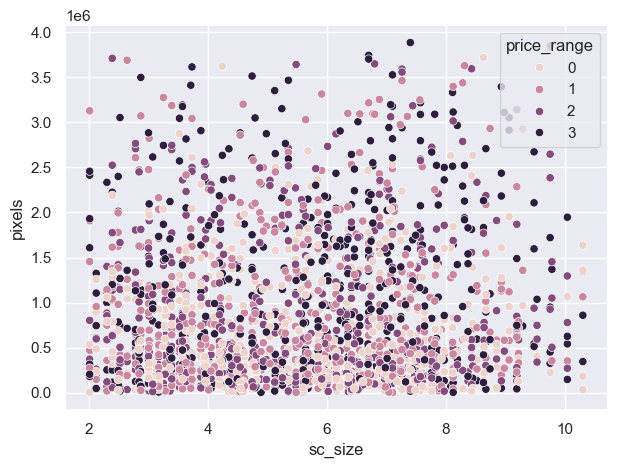

In [34]:
#Checked the relationship between independent and dependent variable.
for i in df.describe().columns[:-1]:
   sns.scatterplot(df,x=i,y=df.describe().columns[-1],hue='price_range')
   plt.show()

In [35]:
#Using function converted MB into GB.
def change(x):
  return x/1000
     

#Applied the above function
df['ram']=df['ram'].apply(change)

In [36]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)

In [37]:
#Since most of the smartphones comes with bluetooth feature, hence we dropped Bluetooth feature. 
df.drop(columns=['blue'],inplace=True)

In [38]:
df.shape

(2000, 17)

In [39]:
df.head()

battery_power  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842          2.2         0   1       0           7    0.6   
1           1021          0.5         1   0       1          53    0.7   
2            563          0.5         1   2       1          41    0.9   
3            615          2.5         0   0       0          10    0.8   
4           1821          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc    ram  talk_time  touch_screen  wifi  price_range  \
0        188        2   2  2.549         19             0     1            1   
1        136        3   6  2.631          7             1     0            2   
2        145        5   6  2.603          9             1     0            2   
3        131        6   9  2.769         11             0     0            2   
4        141        2  14  1.411         15             1     0            1   

   sc_size     pixels  
0     4.49    15120.0  
1     6.80  1799140.0  
2     4.40  2167308.0  
3     7.04  2171776.0  
4     3.25  1464096.0

## Train and test

In [40]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [41]:
X.shape
     

(2000, 16)

In [42]:

y.shape
     

(2000,)

### Feature scaling

In [43]:
# split the data into 4 parts x_train,x_test,y_train,y_test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [44]:
#Created an object for StandardScaler
stand = StandardScaler()
     

#Scalling
x_train = stand.fit_transform(x_train)
x_test = stand.transform(x_test)
     

## Model Implementation

### check overfitting

In [45]:
def check_overfit(model_name):
  train_sizes,train_scores,test_scores = learning_curve(model_name,x_train,y_train,cv=5)
  train_scores_mean = np.mean(train_scores,axis=1)
  test_scores_mean = np.mean(test_scores,axis=1)
  plt.plot(train_sizes,train_scores_mean,label='Training score')
  plt.plot(train_sizes,test_scores_mean,label='Test score')
  
  plt.title("learning curve")
  plt.xlabel("training set size")
  plt.ylabel("Accuracy score")
  plt.legend(loc='best')
  plt.show()
 

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)




     
LogisticRegression()

# Prediction

y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

Confusion Matrix:
 [[120   5   0   0]
 [  4 119   2   0]
 [  0   9 114   2]
 [  0   0   7 118]]


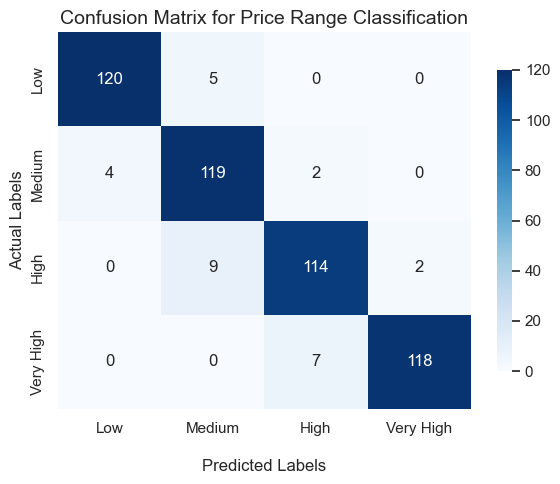


Classification Report:

              precision    recall  f1-score   support

         Low       0.97      0.96      0.96       125
      Medium       0.89      0.95      0.92       125
        High       0.93      0.91      0.92       125
   Very High       0.98      0.94      0.96       125

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



In [47]:

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cf_matrix)

# Plot heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d', cbar_kws={"shrink": 0.8})

# Set titles and labels
ax.set_title('Confusion Matrix for Price Range Classification', fontsize=14)
ax.set_xlabel('\nPredicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)

# Set tick labels for multiclass classification
ax.xaxis.set_ticklabels(['Low', 'Medium', 'High', 'Very High'])
ax.yaxis.set_ticklabels(['Low', 'Medium', 'High', 'Very High'])

plt.tight_layout()
plt.show()

# Optional: Show classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_test, target_names=['Low', 'Medium', 'High', 'Very High']))


## Decision Tree

In [48]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [49]:
y_pred_test = dtc.predict(x_test)
y_pred_train = dtc.predict(x_train)
accuracy_score(y_test, y_pred_test)

0.824

In [50]:
print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       114
           1       0.94      0.76      0.84       154
           2       0.65      0.75      0.70       108
           3       0.82      0.83      0.83       124

    accuracy                           0.82       500
   macro avg       0.82      0.83      0.82       500
weighted avg       0.84      0.82      0.83       500



In [51]:
df.columns

Index(['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'sc_size', 'pixels'],
      dtype='object')

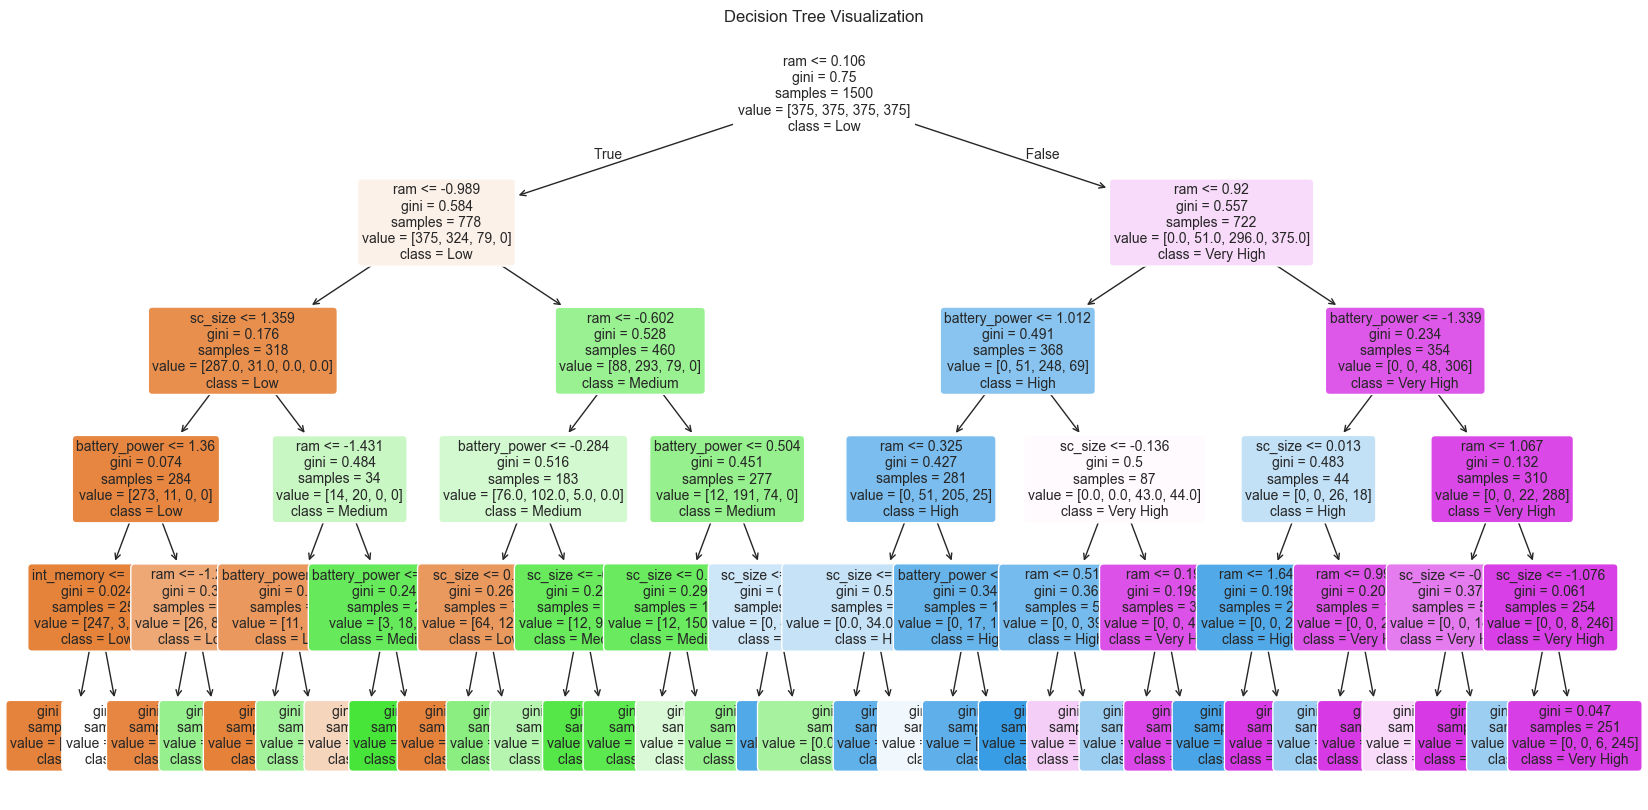

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(20,10))
plot_tree(
    dtc,
    feature_names=['battery_power', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'sc_size', 'pixels'],
    class_names=['Low', 'Medium', 'High', 'Very High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

In [53]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid.fit(x_train, y_train)
     

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.793 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.783 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.767 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.770 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.790 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [54]:
y_pred_test = grid.predict(x_test)
y_pres_train = grid.predict(x_train)
# Evaluation metrics for test

print('Classification Report for Decision Tree (Test set)= ')
print(classification_report(y_test, y_pred_test))

Classification Report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       125
           1       0.86      0.88      0.87       125
           2       0.81      0.82      0.81       125
           3       0.91      0.86      0.88       125

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



[[119   6   0   0]
 [  9 110   6   0]
 [  0  12 102  11]
 [  0   0  18 107]]


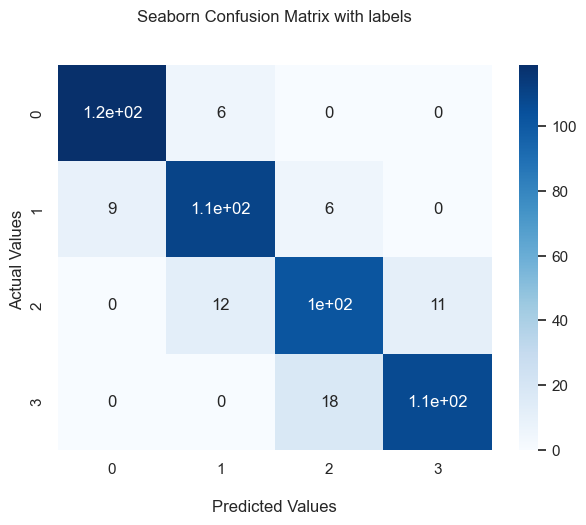

In [55]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [56]:
print('Classification Report for Decision Tree (Train set)= ')
print(classification_report(y_train, y_pred_train))

Classification Report for Decision Tree (Train set)= 
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       375
           1       0.80      0.91      0.85       375
           2       0.84      0.77      0.80       375
           3       0.92      0.92      0.92       375

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
     

In [58]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(x_train, y_train)
     

RandomForestClassifier(n_estimators=300)

In [59]:
y_pred = clsr.predict(x_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.896

In [60]:
y_pred_train = clsr.predict(x_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       125
           1       0.84      0.92      0.88       125
           2       0.89      0.81      0.85       125
           3       0.93      0.91      0.92       125

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Confusion Matrix:
 [[118   7   0   0]
 [  8 115   2   0]
 [  0  15 101   9]
 [  0   0  11 114]]


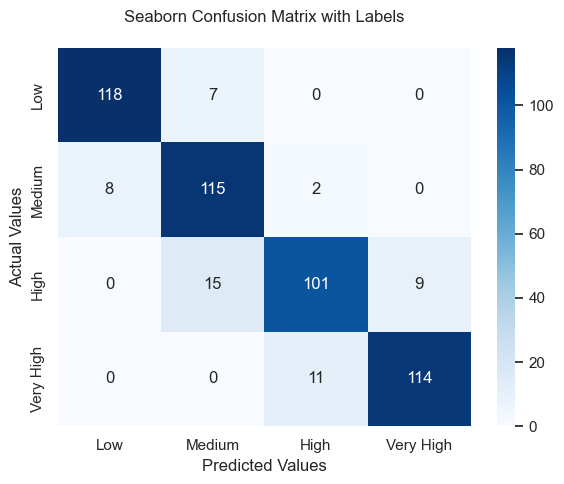

In [62]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Print matrix
print("Confusion Matrix:\n", cf_matrix)

# Plot heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels and title
ax.set_title('Seaborn Confusion Matrix with Labels\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

# Set custom tick labels (optional - for better readability)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
ax.set_yticklabels(['Low', 'Medium', 'High', 'Very High'])

plt.tight_layout()
plt.show()

In [63]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

Feature     Score
0            ram  0.524048
1  battery_power  0.083364
2         pixels  0.077177
3      mobile_wt  0.042917
4        sc_size  0.041303

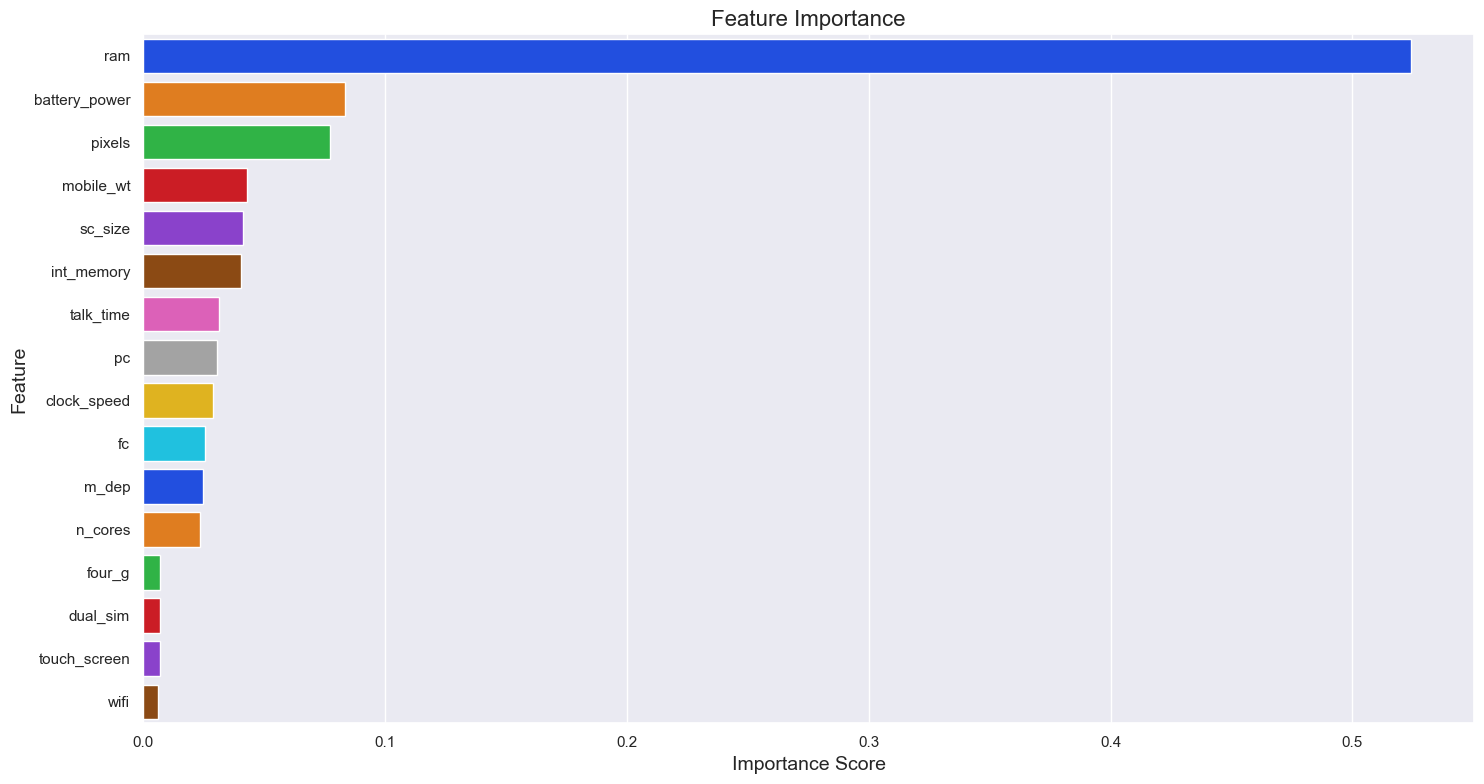

In [64]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='Score', y='Feature', data=feature_importance, palette='bright', ax=ax)

# Optional: add title and axis labels
ax.set_title("Feature Importance", fontsize=16)
ax.set_xlabel("Importance Score", fontsize=14)
ax.set_ylabel("Feature", fontsize=14)

plt.tight_layout()
plt.show()

### Hyperparameter turning

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt', 4, 'log2'],  # ✅ Removed 'auto'
    'max_leaf_nodes': [10, 20, 40]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X, y)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40],
                                        'max_features': ['sqrt', 4, 'log2'],
                                        'max_leaf_nodes': [10, 20, 40],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [66]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_leaf_nodes': 40,
 'max_features': 4,
 'max_depth': 10}

In [67]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=4, max_leaf_nodes=40,
                       min_samples_split=6, random_state=42)

In [68]:
random_search.best_score_

np.float64(0.8544954249601925)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [70]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.848

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.81      0.81      0.81       118
           2       0.77      0.72      0.74       120
           3       0.87      0.90      0.89       130

    accuracy                           0.85       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.85      0.85      0.85       500



[[126   6   0   0]
 [ 10  95  13   0]
 [  0  17  86  17]
 [  0   0  13 117]]


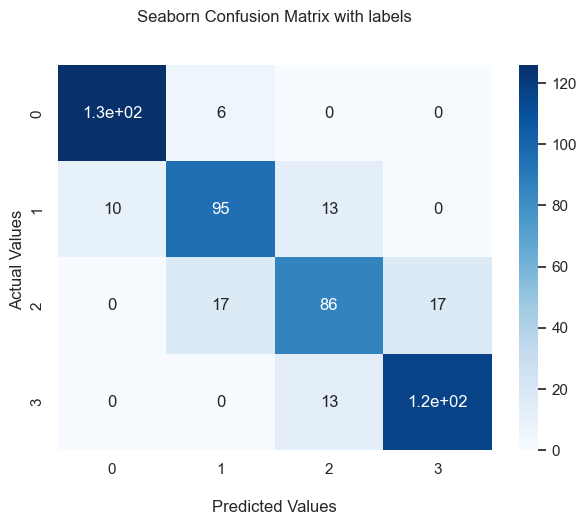

In [72]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
y_pred = clsr.predict(X)
accuracy_score(y, y_pred)

0.9275

In [74]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()
     

Feature     Score
0            ram  0.712027
1  battery_power  0.074634
2         pixels  0.065070
3     int_memory  0.023862
4      mobile_wt  0.022867

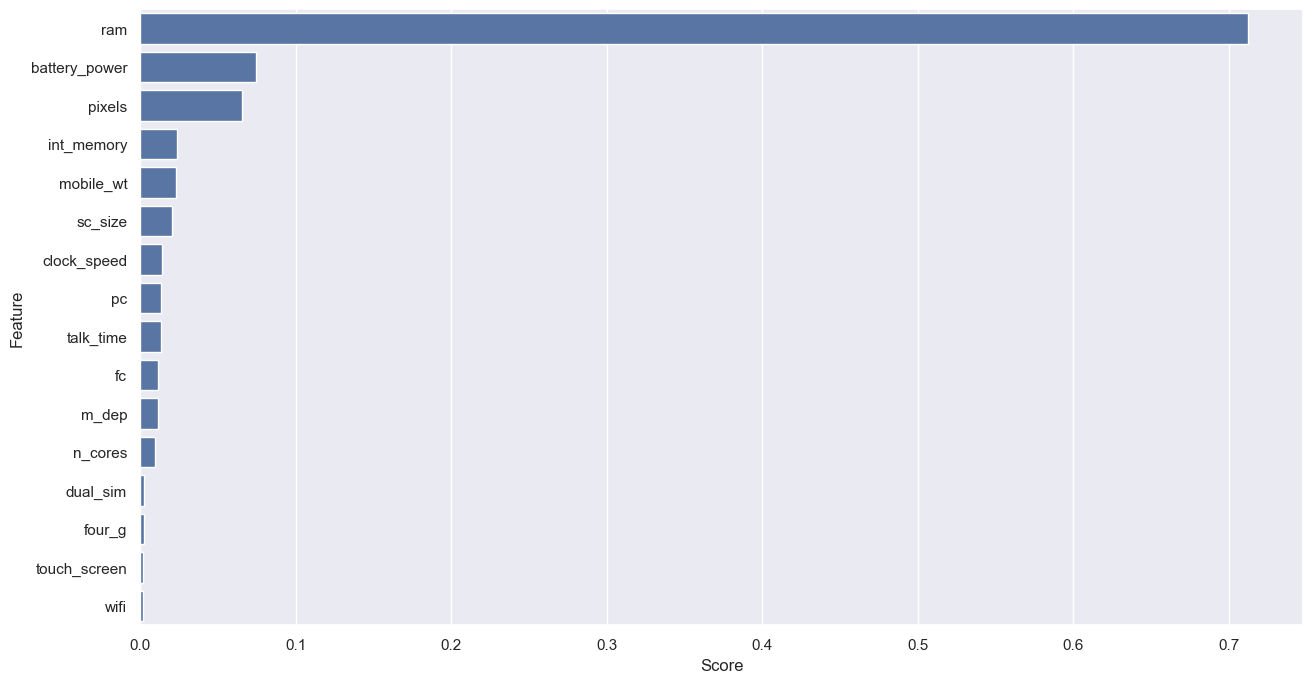

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

## SVM 

In [76]:
print(x_train.shape)  # Should be (n, features)
print(y_train.shape)  # Should be (n,)

(1500, 16)
(1500,)


In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Now check
print(x_train.shape)  # e.g., (1500, 20)
print(y_train.shape) 

(1500, 16)
(1500,)


In [81]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import randint

svc_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'],
    'degree': [2, 3, 4]
}

svc_cv = RandomizedSearchCV(SVC(), param_distributions=svc_params, 
                            n_iter=1, cv=3, scoring='accuracy', 
                            n_jobs=-1, random_state=42, verbose=1)
svc_cv.fit(x_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=1, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=1)

In [82]:

#got best parameters
svc_cv.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10}

In [83]:
scv =SVC(C=10,kernel='rbf')
scv.fit(x_train,y_train)

SVC(C=10)

In [84]:
#Model prediction 
scv_pred = scv.predict(x_test)

In [85]:
scv_accuracy = accuracy_score(scv_pred,y_test)

In [86]:
scv_accuracy

0.306

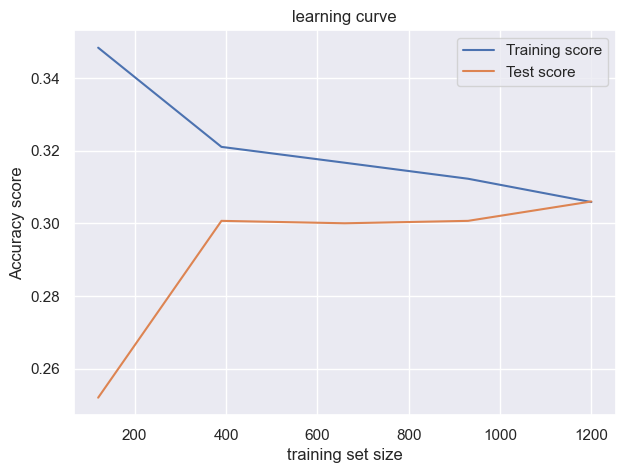

In [87]:
check_overfit(scv)

In [88]:
report = classification_report(y, y_pred, target_names=['Low', 'Medium', 'High', 'Very High'])
print(report)

              precision    recall  f1-score   support

         Low       0.95      0.97      0.96       500
      Medium       0.90      0.90      0.90       500
        High       0.90      0.88      0.89       500
   Very High       0.95      0.96      0.96       500

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



[[487  13   0   0]
 [ 24 449  27   0]
 [  0  36 440  24]
 [  0   0  21 479]]


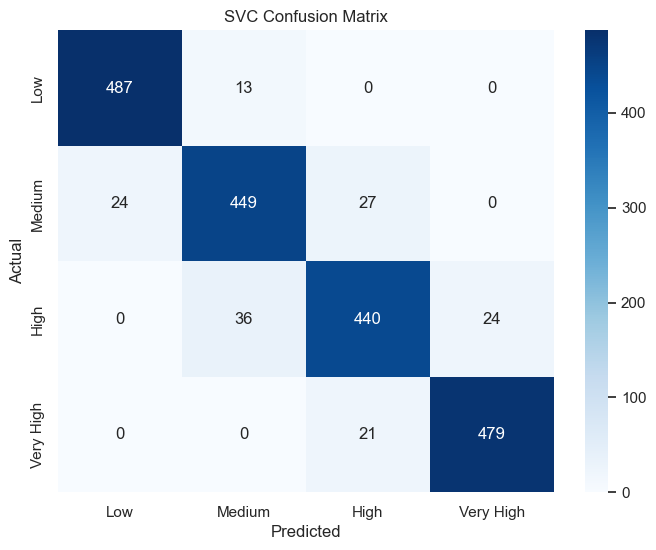

In [89]:
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)

# Optional: define class labels
labels = ['Low', 'Medium', 'High', 'Very High']

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)

plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

* From EDA we can see that here are mobile phones in 4 price ranges. The number of elements is almost similar.
* half the devices have Bluetooth, and half don’t
* there is a gradual increase in battery as the price range increases
* Ram has continuous increase with price range while moving from Low cost to Very high cost
* costly phones are lighter
*  RAM, battery power, pixels played more significant role in deciding the price range of mobile phone.
*  There are some top features like Ram,battery_power,px_width,px_height, mobile_wt.
*  SVM also performed well but took longer to train.
*   Logistic Regression gave quick results but was slightly less accurate.
*   Among all models, **Random Forest** achieved the highest accuracy and F1-score.
*   Decision Tree overfitted slightly but is more interpretable.

In [90]:
import joblib

# Save the model
joblib.dump(clsr, 'model.pkl') 

['model.pkl']